# Data science libraries

29th of November

* Python as a "go-to" language for data science (DS) / machine learning because of its (open-source) libraries
* we've seen pandas for powerful data manipulation and numpy for numerical computations, but this is far from what Python has to offer for DS
* we need tools for typical DS tasks such as **Regression**, **Classification**, **Clustering**

* to name a few data-science libraries (in no particular order)
    * [scikit-learn]()
        * supervised vs. unsupervised learning
        * validation 
        * evaluation
        * CPU optimized

    * [scipy]()
        * optimization algorithms
        * statistics
        * fourier transforms

    * [torch]() / [tensorflow]() (+ [keras]())
        * neural networks
        * GPU optimized 
        * state-of-the-art for NLP/vision/...
    * [lightgbm]() / [xgboost]() / [catboost]()
        * tree methods
        * state-of-the-art for tabular datasets

* we will look at scikit-learn and lightgbm using some [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)

* we will not focus on the algorithmic/estimation part of the models but on the programming side

* [mlflow](https://mlflow.org/) is a great platform which can help you in different parts of your ML/DS lifecycle, e.g.
    * tracking experiments
    * package DS projects
    * register and deploy trained models

* [kaggle](https://www.kaggle.com/) great resource to see the state-of-the-art approaches and methods to different problems


In [9]:
import pandas as pd
import sklearn 
import sklearn.datasets
from typing import List, Dict, Union

import lightgbm
import matplotlib.pyplot as plt

## Scikit-learn 

* contains implementations of a number of ML algorithms - called **estimators**
* estimators typically have a standardized method names / attributes - e.g. `.fit()` and `.predict()` methods


### Regression (California housing)

* was going to use [boston housing prices dataset](), which is a standard but apparently there are some [ethical concerns]()

In [57]:
# TODO: alternative
#housing = sklearn.datasets.fetch_openml(name="house_prices", as_frame=True)

In [10]:
sklearn.datasets.load_boston()['DESCR'];

c:\Users\Martin Hronec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inc

* we will use California house prices dataset

In [59]:
sklearn.datasets.fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [60]:
data_raw = sklearn.datasets.fetch_california_housing()

In [61]:
print(data_raw['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [62]:
label = pd.Series(data_raw['target'], name = data_raw['target_names'][0])

In [63]:
df = pd.DataFrame(data_raw['data'], columns = data_raw['feature_names'])

In [64]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [65]:
df.isnull().mean()

MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
dtype: float64

In [66]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


* we want to be able to predict the prices of unseen houses
    * "explainning"/overfitting the already seen data is very easy with high capacity models (e.g. trees, neural nets, etc.)
* to achieve this, we usually split the available data according to some validation scheme
* validation scheme needs to respect the nature of a forecasting problem 
    * cross-validation 
    * temporal validation

* you can use sklearn validation utils for standard tasks or write your own for more exotic
* don't forget to set random_state so that your results can be reproduced

In [69]:
# simple random split using sklearn
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, label, test_size = 0.3, random_state  = 42)

In [72]:
df.shape, X_train.shape, X_test.shape;

* machine learning models have number of hyperparameters that need to be tweaked
    * searching for optimal using only in-sample (seen) data not good
    * using test-set from above leads to "overfitting" on the test set
* typical solution is to introduce so called validation set used only for evaluating hyperparameters
    * splitting dataset into 3 parts however makes our dataset we can learn from drastically smaller 
* cross-validation (or temporal validation)
    * TODO: describe
* cross validation iterators are handy and return the indices of the original dataframes 


In [73]:
kf5 = sklearn.model_selection.KFold(n_splits = 5)

In [81]:
data = pd.concat([df, label], axis = 1)

In [86]:
i = 0
for train_idx, test_idx in kf5.split(data):

    print(f'split no. {i}')
    print(train_idx, test_idx)

    train_data = data.loc[train_idx,:]
    test_data = data.loc[test_idx,:]

split no. 0
[ 4128  4129  4130 ... 20637 20638 20639] [   0    1    2 ... 4125 4126 4127]
split no. 0
[    0     1     2 ... 20637 20638 20639] [4128 4129 4130 ... 8253 8254 8255]
split no. 0
[    0     1     2 ... 20637 20638 20639] [ 8256  8257  8258 ... 12381 12382 12383]
split no. 0
[    0     1     2 ... 20637 20638 20639] [12384 12385 12386 ... 16509 16510 16511]
split no. 0
[    0     1     2 ... 16509 16510 16511] [16512 16513 16514 ... 20637 20638 20639]



* typical situation arises when you need to respect certain classes/groups in the data during splitting process
    * use `GroupKFold` data for this
* to respect time-series nature of the problem, you can use `TimeSeriesSplit`


* we want to fit the model using the train data in each fold and predict the test data in each fold
    * we can start with the simplest "model" -> sample mean


In [92]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [98]:
label = 'MedHouseVal'
kf_predictions = pd.DataFrame()

i = 0
for train_idx, test_idx in kf5.split(data):
    print(f'split no. {i}')
    train_data = data.loc[train_idx,:]
    test_data = data.loc[test_idx,:]

    # "fitting" part
    sample_mean = train_data[label].mean()
    # prediction part 
    test_data['prediction'] = sample_mean

    # save predictions
    test_data['split'] = i
    kf_predictions = pd.concat([kf_predictions, test_data], axis = 0)
    i = i + 1 

split no. 0
split no. 1
split no. 2
split no. 3
split no. 4


* we have our first predictions, even though simple ones
* NOTE: when you have large data that don't fit into RAM, you can do the forecasting/predicting "lazily"
    * save individual split results or save only split-metrics 

### Evaluation

* regression task:
    * typically MSE, MAE, MAPE, wMAPE or r2
* evaluation strategy should take into account what stakeholder wants, the kitchen-sink approach not recommended
* we are interested in out-of-sample!
    * sometimes it is interesting to look at in-sample and compare errors in-sample vs out-of-sample
* scikit-learn offers number of most commonly used metrics, see [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

* `kf_predicitions` contains out-of-sample predictions from individual splits (even though for now these are simply sample means)
    * we can look at the overall score as well as specific splits (shows stability)

In [122]:
split_results = pd.concat([
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.mean_squared_error(x[label], x['prediction'])),
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.mean_absolute_error(x[label], x['prediction'])),
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.r2_score(x[label], x['prediction'])),
    ], axis = 1)
split_results.columns = ['MSE','MAE', 'r2']

In [123]:
split_results

,MSE,MAE,r2
split,,,
0,1.306462,0.971558,-0.216137
1,1.198934,0.794484,-0.024237
2,1.572735,0.944996,-0.093293
3,1.258655,0.939208,-0.072854
4,1.514490,0.974571,-0.039344


* now we have a basic modelling workflow implemented and we can fit an actual model
* models/estimators in scikit-learn have standardized methods which provides great modularity
    * we will see in a couple of minutes, that we can simply switch one model from another and reuse the whole pipeline!

* `.fit(X,y)`
    * `X` - sample matrix (n_samples, n_features)
    * `y` - the target values y which (e.g. real numbers for regression, or ints for classification)
        * `y` not specified for the regression tasks 

* `.predict(X)`
    * 

* lets replace the sample mean with some econometrics model

In [126]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [128]:
label

'MedHouseVal'

In [129]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
labels = ['MedHouseVal']


kf_predictions = pd.DataFrame()
i = 0
for train_idx, test_idx in kf5.split(data):
    print(f'split no. {i}')
    train_data = data.loc[train_idx,:]
    test_data = data.loc[test_idx,:]

    # "fitting" part
    model = sklearn.linear_model.LinearRegression()
    model.fit(train_data[features], train_data[label])

    # prediction part 
    test_data['prediction'] = model.predict(test_data[features])

    # save predictions
    test_data['split'] = i
    kf_predictions = pd.concat([kf_predictions, test_data], axis = 0)
    i = i + 1 

split_results = pd.concat([
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.mean_squared_error(x[label], x['prediction'])),
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.mean_absolute_error(x[label], x['prediction'])),
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.r2_score(x[label], x['prediction'])),
    ], axis = 1)
split_results.columns = ['MSE','MAE', 'r2']

split no. 0
split no. 1
split no. 2
split no. 3
split no. 4


In [130]:
split_results

,MSE,MAE,r2
split,,,
0,0.484859,0.545994,0.548663
1,0.622497,0.566178,0.468207
2,0.646210,0.576550,0.550784
3,0.543200,0.531906,0.536987
4,0.494685,0.516853,0.660514


* using OLS instead of just looking at the mean helps a lot (of course)
* before trying another model, let's put above code into a function so it is reusable

In [197]:
def train_predict(data: pd.DataFrame, n_splits: int, features: List[str], label: str, model, model_args: Union[None,Dict]):
    """

    Args: 

    Returns:
    
    """

    kfold_predictions = pd.DataFrame()

    i = 0
    kfold = sklearn.model_selection.KFold(n_splits=n_splits)

    for train_idx, test_idx in kfold.split(data):

        train_data = data.loc[train_idx,:]
        test_data = data.loc[test_idx,:]

        # model initialization
        if model_args is not None:
            split_model = model(**model_args)
        else:
            split_model = model()

        # fit/estimate the model 
        split_model.fit(X = train_data[features], y = train_data[label])

        # prediction on unseen data using fit model
        test_data['prediction'] = split_model.predict(test_data[features])

        # save split name and  predictions
        test_data['split'] = i
        kfold_predictions = pd.concat([kfold_predictions, test_data], axis = 0)
        i = i + 1 

    return kfold_predictions

def eval_predicted(split_predictions: pd.DataFrame,label: str,eval_metrics = [sklearn.metrics.mean_squared_error, sklearn.metrics.r2_score]):

    split_results = pd.concat([
        split_predictions.groupby(['split']).apply(lambda x: eval_metric(x[label], x['prediction'])) for eval_metric in eval_metrics], axis = 1)
    split_results.columns = [m.__name__ for m in eval_metrics]

    return split_results 

In [205]:
# we could pack 2 functions below into separate function
model_args = {'fit_intercept': True}
predictions = train_predict(data = data, n_splits = 5, model = sklearn.linear_model.LinearRegression, features = features, label = label, model_args= model_args)
eval_predicted(split_predictions = predictions, label =  'MedHouseVal', eval_metrics= [sklearn.metrics.mean_squared_error,sklearn.metrics.mean_absolute_percentage_error])

,mean_squared_error,mean_absolute_percentage_error
split,,
0,0.484859,0.472863
1,0.622497,0.268254
2,0.646210,0.277037
3,0.543200,0.331847
4,0.494685,0.292861


* now let's switch sklearn model for LGBM!
* our pipeline should still work (LGBM models also have `.fit()` and `.predict()`)

In [207]:
lgb_args = {
    'boosting_type': 'gbdt',
    'learning_rate': 0.1
}
predictions = train_predict(data = data, n_splits = 5, model = lightgbm.LGBMRegressor, features = features, label = label, model_args= lgb_args)
eval_predicted(split_predictions = predictions, label =  'MedHouseVal', eval_metrics= [sklearn.metrics.mean_squared_error,sklearn.metrics.mean_absolute_percentage_error])

[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: fit_intercept


,mean_squared_error,mean_absolute_percentage_error
split,,
0,0.370611,0.355926
1,0.348273,0.198146
2,0.361325,0.227280
3,0.362462,0.258604
4,0.453471,0.221525


* 2-times better with default hyperparamters!
   * NOTE: they really should teach more trees at IES!

* let's look at another example, classification this time

### Classifying recognizing hand-written digits

* [example from scikit website](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

In [209]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [210]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

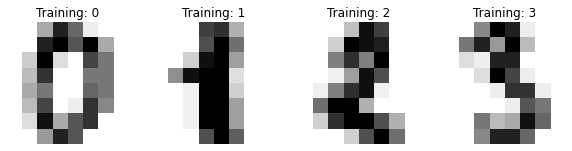

In [211]:

digits.images[0]

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [212]:
# flatten the images
n_samples = len(digits.images)

In [213]:
data = digits.images.reshape((n_samples, -1))

In [220]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
clf_alt = lightgbm.LGBMClassifier()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [221]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)
clf_alt.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
predicted_alt = clf_alt.predict(X_test)

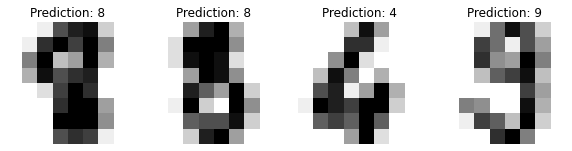

In [232]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

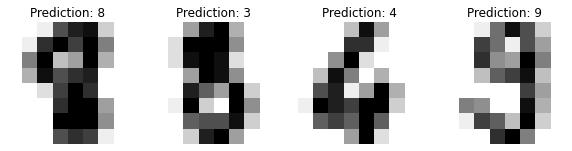

In [235]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, prediction in zip(axes, X_test, predicted_alt):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [237]:
# classification report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [238]:
print(metrics.classification_report(y_test, predicted_alt))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        88
           1       0.86      0.84      0.85        91
           2       0.99      0.90      0.94        86
           3       0.92      0.84      0.87        91
           4       0.99      0.90      0.94        92
           5       0.89      0.92      0.91        91
           6       0.96      0.98      0.97        91
           7       0.92      0.96      0.94        89
           8       0.88      0.86      0.87        88
           9       0.80      0.92      0.86        92

    accuracy                           0.91       899
   macro avg       0.91      0.91      0.91       899
weighted avg       0.91      0.91      0.91       899



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


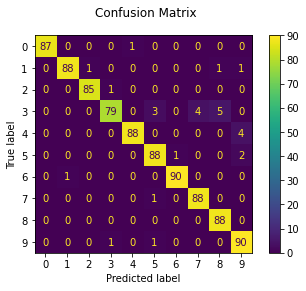

In [218]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Encoding (if we have time)